<h1 style = "font-size:3rem;color:blue;"> Drifter Data Analysis</h1>



Data formatting for Biogeochemical Drifter field observations


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime

import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

Read in data and parse by column header


In [3]:
filename = '24110600'

fullname = filename+'.csv'

filepath = os.path.join('D:', fullname)

df = pd.read_csv(filepath, parse_dates = [[0, 1]], header = None)

df.columns = ['time', 'elapsed time (sec)', 'lat_raw', 'N or S', 'lon_raw', 'E or W', 'altitude', 'speed', 'angle', 'pH', 'Temperature (C)', 'DO (mg/L)', 'Conductivity (uS/cm)']

df.head()

,time,elapsed time (sec),lat_raw,N or S,lon_raw,E or W,altitude,speed,angle,pH,Temperature (C),DO (mg/L),Conductivity (uS/cm)
0,2024-11-06 18:31:53.062,2,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.00,0.00,0.0
1,2024-11-06 18:31:55.062,4,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,28.59,16.78,0.0
2,2024-11-06 18:31:57.062,6,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,28.61,9.04,0.0
3,2024-11-06 18:31:59.062,8,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,28.74,9.01,0.0
4,2024-11-06 18:32:01.062,10,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,28.75,8.99,0.0


In [6]:
# GPS spits out lat DDMM.MMMM, lon DDDMM.MMMM, so additional processing required
def lat_convert(lat_badfmt):
    lat_badfmt = str(lat_badfmt)
    lat_DD = int(float(lat_badfmt)/100) # get DDD part
    lat_MM = float(lat_badfmt)-lat_DD*100 # get MM.MMM part
    lat_deg = float(lat_DD)+float(lat_MM)/60 # add minutes divided by 60 to degrees
    return lat_deg

def lon_convert(lon_badfmt):
    lon_badfmt = str(lon_badfmt)
    lon_DD = int(float(lon_badfmt)/100) # get DDD part
    lon_MM = float(lon_badfmt)-lon_DD*100 # get MM.MMM part
    lon_deg = float(lon_DD)+float(lon_MM)/60 # add minutes divided by 60 to degrees
    return lon_deg

# Do the conversion on real data
df['lat'] = df['lat_raw'].apply(lat_convert)
df['lon'] = df['lon_raw'].apply(lon_convert)

# South should be negative
south = df['N or S'] == 'S'
df['lat'][south] *= -1 

# West should be negative
west = df['E or W'] == 'W'
df['lon'][west] *= -1 

# Take a look
df.head()

C:\Users\Stephen\AppData\Local\Temp\ipykernel_37524\251891894.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat'][south] *= -1
C:\Users\Stephen\AppData\Local\Temp\ipykernel_37524\251891894.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lon'][west] *= -1


,time,elapsed time (sec),lat_raw,N or S,lon_raw,E or W,altitude,speed,angle,pH,Temperature (C),DO (mg/L),Conductivity (uS/cm),lat,lon
0,2024-11-06 18:31:53.062,2,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0
1,2024-11-06 18:31:55.062,4,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,28.59,16.78,0.0,0.0,0.0
2,2024-11-06 18:31:57.062,6,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,28.61,9.04,0.0,0.0,0.0
3,2024-11-06 18:31:59.062,8,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,28.74,9.01,0.0,0.0,0.0
4,2024-11-06 18:32:01.062,10,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,28.75,8.99,0.0,0.0,0.0


In [ ]:
# def plot_gps_points(lon, lat):
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}) 
stamen_terrain = cimgt.Stamen('terrain')
ax.add_image(stamen_terrain, 8)

# Plot the GPS points
ax.plot(lon, lat, 'bo', markersize=5, transform=ccrs.PlateCarree())

# Add gridlines
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.show(df.lon,df.lat)


In [ ]:
plt.scatter(df.lon, df.lat)
plt.ylim((34.138,34.142))
plt.xlim((-77.862,-77.863))

C:\Users\Stephen\AppData\Local\Temp\ipykernel_37524\4246058498.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


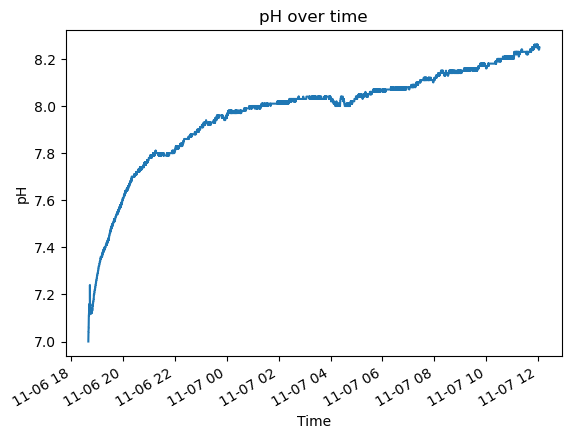

In [8]:

ph_threshold = 7
df_filtered = df[df['pH'] >= ph_threshold]
time= df_filtered['time']
ph = df_filtered['pH']

fig, axs = plt.subplots()
axs.plot(time,ph)
axs.set_title('pH over time')
axs.set_xlabel('Time')
axs.set_ylabel('pH')

fig.autofmt_xdate()

fig.show()

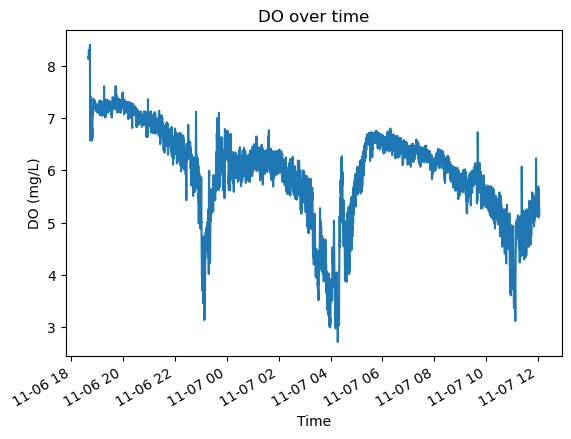

In [48]:
DO = df_filtered['DO (mg/L)']

fig, axs = plt.subplots()
axs.plot(time,DO)
axs.set_title('DO over time')
axs.set_xlabel('Time')
axs.set_ylabel('DO (mg/L)')

fig.autofmt_xdate()

Text(0, 0.5, 'Temperature (C)')

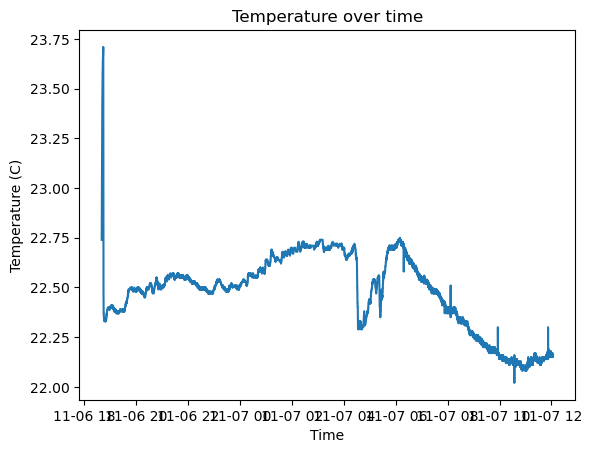

In [12]:
temp = df_filtered['Temperature (C)']

plt.plot(time,temp)
plt.title('Temperature over time')
plt.xlabel('Time')
plt.ylabel('Temperature (C)')

Text(0, 0.5, 'Conductivity (uS/cm)')

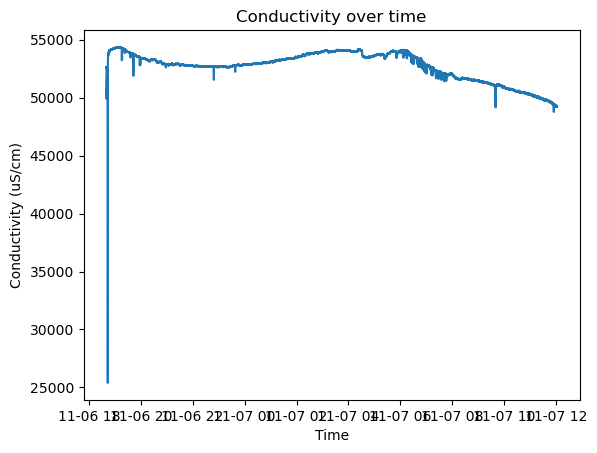

In [14]:
cond = df_filtered['Conductivity (uS/cm)']

plt.plot(time,cond)
plt.title('Conductivity over time')
plt.xlabel('Time')
plt.ylabel('Conductivity (uS/cm)')

In [ ]:
DO_mean = np.nanmean(DO)
DO_STD = np.nanstd(DO)
DOZ = ((DO-DO_mean)/DO_STD)

ph_mean = np.nanmean(ph)
ph_STD = np.nanstd(ph)
phZ = ((ph-ph_mean)/ph_STD)

DOph_correlation_coeff = ((DOZ*phZ)/(len(DOZ)-1))
DOZCorr = DOZ * DOph_correlation_coeff

In [ ]:
plt.scatter(DOZ,phZ)
plt.plot(DOZ, DOZCorr)
plt.title('DO vs pH')
plt.xlabel('DO mg/L')
plt.ylabel('pH')

In [ ]:
plt.scatter(DO, temp)
plt.title('DO vs temp')
plt.xlabel('DO mg/L')
plt.ylabel('Temperature (C)')

In [ ]:
stamen_terrain = cimgt.Stamen('terrain-background')

# Create the map
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_image(stamen_terrain, 8)  # Adjust the zoom level as needed

# Plot GPS points
plt.scatter(lon, lat, color='red', s=50, transform=ccrs.PlateCarree(), label='GPS Points')
plt.legend()

# Add title and show plot
plt.title("GPS Points on Stamen Terrain Map")
plt.show()

In [38]:
CORMP = 'CORMP_DATA_NOV6'
fullCORMP = CORMP + '.csv'
pathing = os.path.join('D:\\', fullCORMP)  # Ensuring path format is correct for Windows

# Load the CSV file, assuming columns 0 and 1 are date and time columns
Cdf = pd.read_csv(pathing, skiprows = 6)

# Rename columns, assuming the remaining column is 'DO'
Cdf.columns = ['time', 'DO', 'Nothing']
print(Cdf.head())

               time    DO        Nothing
0  2024-11-06 05:00  7.40  not evaluated
1  2024-11-06 05:15  7.39  not evaluated
2  2024-11-06 05:30  7.38  not evaluated
3  2024-11-06 05:45  7.39  not evaluated
4  2024-11-06 06:00  7.35  not evaluated


In [46]:
cormptime = Cdf['time']
cormpDO = Cdf['DO']
Ctdf = pd.DataFrame(cormptime)

# Convert the 'time' column to datetime format
Ctdf['time'] = pd.to_datetime(Ctdf['time'], format="%m/%d/%Y %H:%M")
plt.plot(time,DO)
plt.plot(Ctdf,cormpDO)

ValueError: time data "2024-11-06 05:00" doesn't match format "%m/%d/%Y %H:%M", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.